In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('TSLA.csv',encoding='latin1')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
fig = px.line(df,x='Date',y='Adj Close',title='Price Plot')
fig.show()

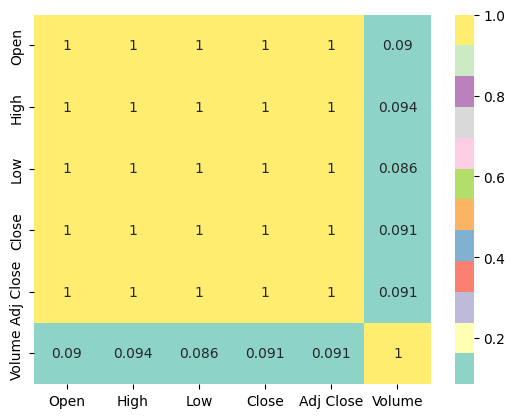

In [6]:
import seaborn as sns
corr = df[['Open','High','Low','Close','Adj Close','Volume']].corr()
sns.heatmap(corr,annot=True,cmap='Set3')
plt.show()

In [7]:
df['precentage'] = df['Close'].pct_change()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,precentage
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,-0.002512
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,-0.078473
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,-0.125683
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-0.160937


In [9]:
df['Volume'] = df['Volume']/10**6

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,precentage
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93.8315,NaN
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85.9355,-0.002512
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41.0940,-0.078473
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25.6990,-0.125683
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34.3345,-0.160937


In [11]:
import numpy as np

In [12]:
for i in range(0,5):
    df[f'lag{i+1}'] = np.nan

df['lag_vol'] = np.nan

In [13]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,precentage,lag1,lag2,lag3,lag4,lag5,lag_vol
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33.4085,0.038768,NaN,NaN,NaN,NaN,NaN,NaN
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27.3272,0.017418,NaN,NaN,NaN,NaN,NaN,NaN
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35.2895,0.079053,NaN,NaN,NaN,NaN,NaN,NaN
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40.2254,0.005161,NaN,NaN,NaN,NaN,NaN,NaN
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22.9019,0.014823,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for i in range(0,2956):
    for j in range(1,6):
        if i!=0:
            df.loc[i,f"lag{j}"] = df.loc[i-1,'precentage']

for i in range(0,2956):
    if i!=0:
        df.loc[i,'lag_vol'] = df.loc[i-1,'Volume']

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(2954, 14)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df['avg_ret'] = df[['lag1','lag2','lag3','lag4','lag5']].mean(axis=1)

In [ ]:
df['dir'] = df['avg_ret'].apply(lambda x: 1 if x>=0 else 0)

In [20]:
x = df[['lag1','lag2','lag3','lag4','lag5','lag_vol']]
y = df['dir']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Training the model

In [21]:
metrics = {'train_accuracy':[],'test_accuracy':[],'train_mse':[],'test_mse':[]}
for i in range(2,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    train_mse = mean_squared_error(y_train,y_pred_train)
    test_mse = mean_squared_error(y_test,y_pred_test)
    metrics['train_accuracy'].append(train_accuracy)
    metrics['test_accuracy'].append(test_accuracy)
    metrics['train_mse'].append(train_mse)
    metrics['test_mse'].append(test_mse)


# Visualising for further Analysis

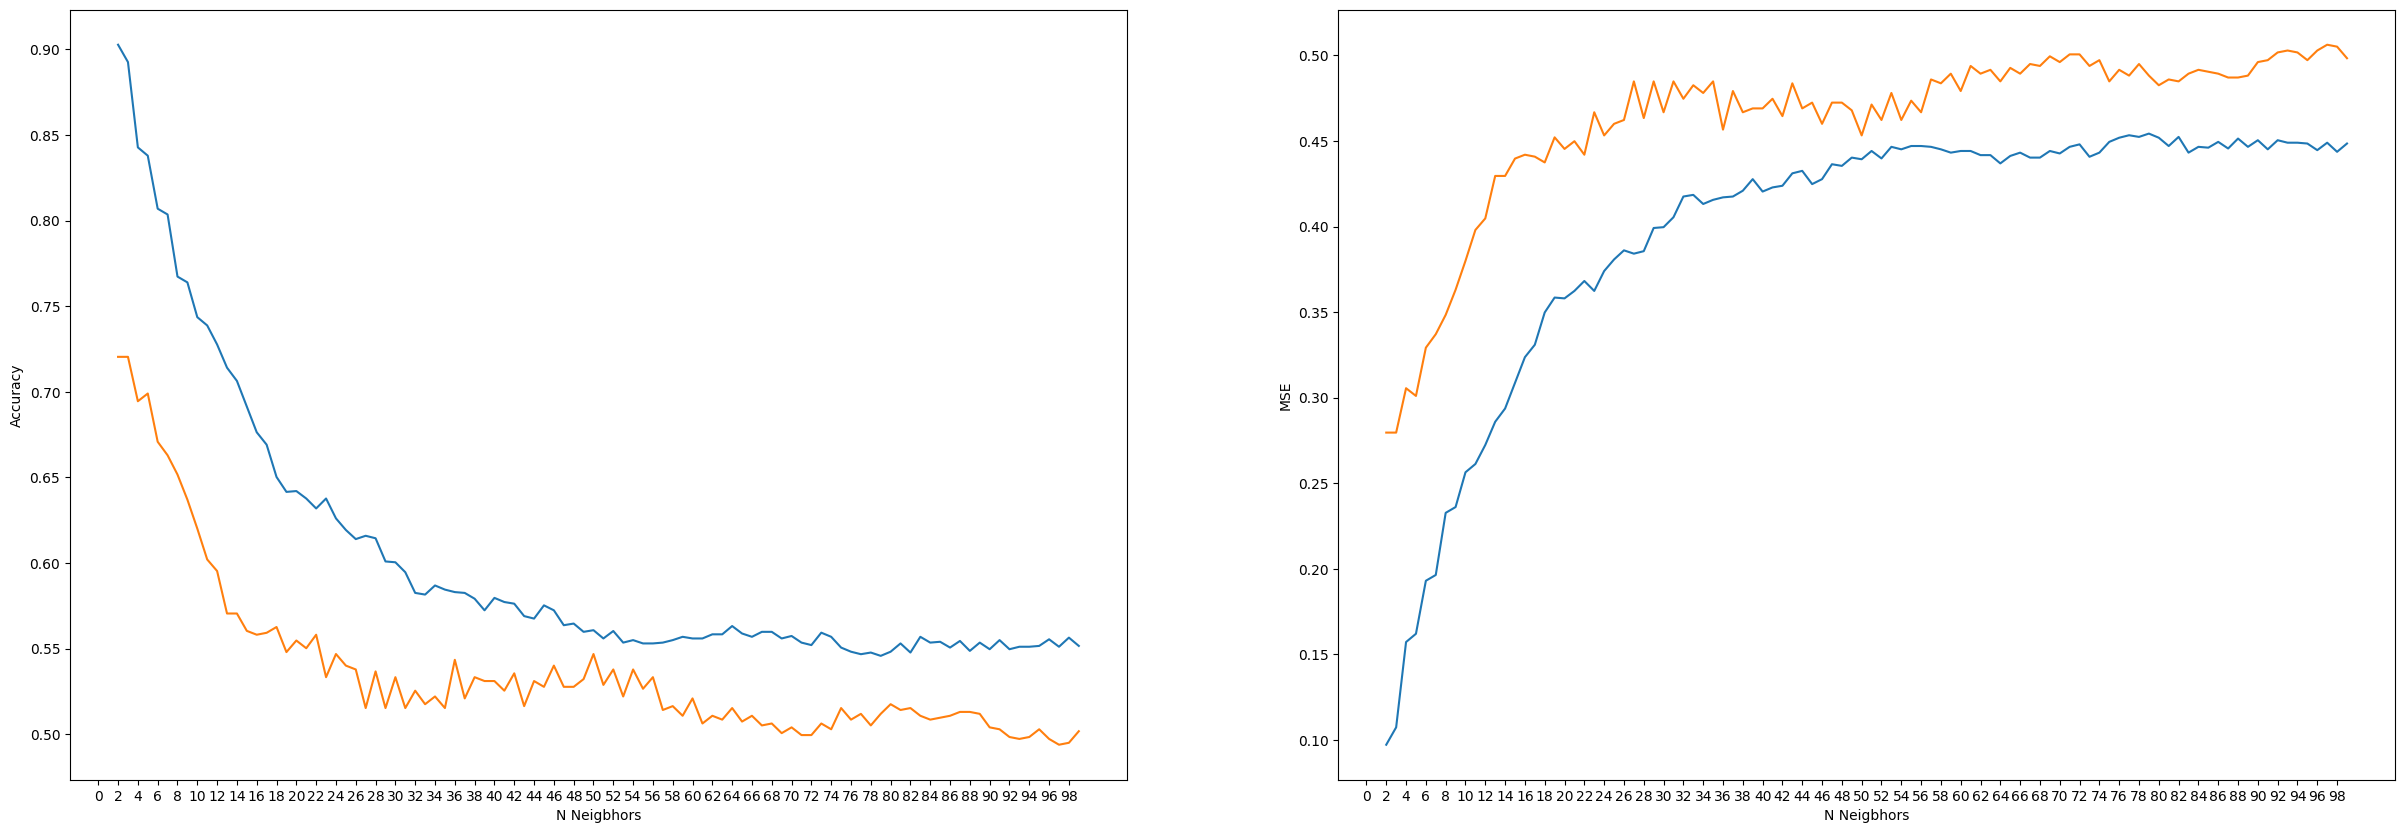

In [22]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(range(2,100),metrics['train_accuracy'],label='train accuracy')
plt.plot(range(2,100),metrics['test_accuracy'],label='test accuracy')
plt.xlabel("N Neigbhors")
plt.xticks(np.arange(0,100,2))
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot(range(2,100),metrics['train_mse'],label='Train MSE')
plt.plot(range(2,100),metrics['test_mse'],label="Test MSE")
plt.xlabel("N Neigbhors")
plt.xticks(np.arange(0,100,2))
plt.ylabel("MSE")


plt.show()

In [23]:
# N neighbors: 50 is the best having lesser difference and loss

In [49]:
neighbors = 50
knn = KNeighborsClassifier(n_neighbors=neighbors)
model = knn.fit(x_train,y_train)

# Now is the time for prediction 

In [25]:
from sklearn.svm import SVR

In [41]:
def create_sequences(df,timestep=5):
    x_open = []
    y_open = []
    df.dropna(inplace=True)
    for i in range(len(df)-timestep):
        x = df['Open'].iloc[i:i+timestep].values
        y = df['Open'].iloc[i+timestep]
        x_open.append(x)
        y_open.append(y)
    return np.array(x_open),np.array(y_open)



In [42]:
x_open,y_open = create_sequences(df)


In [46]:
x_open_train,x_open_test,y_open_train,y_open_test = train_test_split(x_open,y_open,test_size=0.3,random_state=1)
x_open_train.reshape(-1,5)
x_open_test.reshape(-1,5)


array([[ 419.869995,  438.440002,  430.130005,  442.      ,  443.350006],
       [  36.896   ,   35.827999,   36.712002,   37.34    ,   37.504002],
       [ 914.77002 ,  910.700012,  916.869995,  965.659973, 1006.799988],
       ...,
       [   5.84    ,    5.552   ,    5.58    ,    5.714   ,    6.      ],
       [  67.106003,   69.566002,   70.699997,   71.25    ,   70.514   ],
       [   7.838   ,    7.89    ,    7.596   ,    7.69    ,    7.66    ]],
      shape=(885, 5))

In [48]:
from sklearn.metrics import r2_score
support = SVR()
support.fit(x_open_train,y_open_train)
y_open_pred = support.predict(x_open_test)
print(r2_score(y_open_test,y_open_pred)*100)

75.26374033689461


In [50]:
import pickle
with open('prediction_model.picke','wb') as f:
    pickle.dump(support,f)

with open('Bull_Bear_model.pickle','wb') as f:
    pickle.dump(model,f)